In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
df = pd.read_csv("AB_NYC_2019.csv")

<AxesSubplot:xlabel='price', ylabel='Count'>

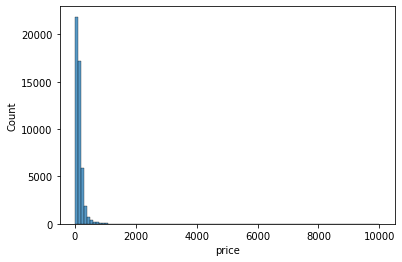

In [87]:
sns.histplot(df['price'],bins=100)
# We see that it is long tail

In [88]:
df_hw = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [89]:
#Q1
df_hw.isnull().sum()
# reviews_per_month has missing values and there are 10052 of them

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [90]:
#Q2
df_hw['minimum_nights'].median()
#Median is 3.0

3.0

In [91]:
n = len(df_hw)
df_id = np.arange(len(df_hw))
np.random.seed(42)
np.random.shuffle(df_id)

In [92]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

In [93]:
df_train = df_hw.iloc[df_id[:n_train]]
df_val = df_hw.iloc[df_id[n_train:n_train+n_val]]
df_test = df_hw.iloc[df_id[n_train+n_val:]]

In [94]:
df_train =df_train.reset_index(drop=True)
df_val =df_val.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)

In [95]:
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)
del df_train['price']
del df_val['price']
del df_test['price']

In [96]:
df_train_mean = df_train
df_train_zero = df_train
df_val_mean = df_val
df_val_zero = df_val
df_test_mean = df_test
df_test_zero = df_test
df_train_mean['reviews_per_month'] = df_train_mean['reviews_per_month'].fillna((df_train_mean['reviews_per_month'].mean()))
df_val_mean['reviews_per_month'] = df_val_mean['reviews_per_month'].fillna((df_train_mean['reviews_per_month'].mean()))
df_test_mean['reviews_per_month'] = df_test_mean['reviews_per_month'].fillna((df_train_mean['reviews_per_month'].mean()))
df_train_zero['reviews_per_month'] = df_train_zero['reviews_per_month'].fillna(0)
df_test_zero['reviews_per_month'] = df_test_zero['reviews_per_month'].fillna(0)
df_val_zero['reviews_per_month'] = df_val_zero['reviews_per_month'].fillna(0)

In [97]:
X_mean_train = df_train_mean.values

In [98]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [99]:
w0, w = train_linear_regression(X_mean_train, y_train)
y_pred = w0 + X_mean_train.dot(w)

In [100]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [101]:
round(rmse(y_train, y_pred),2)

0.64

In [102]:
#Q 3 
X_zero_train = df_train_zero.values
w0, w = train_linear_regression(X_zero_train, y_train)
y_pred = w0 + X_zero_train.dot(w)
round(rmse(y_train, y_pred),2)
# Both give same results

0.64

In [103]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [105]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
length = len(r)

In [107]:
# Q4 
for val in range(length):
    w0, w = train_linear_regression_reg(X_zero_train, y_train, r[val])
    X_val_train = df_val_zero.values
    #X_val = prepare_X(df_val)
    y_pred = w0 + X_val_train.dot(w)
    print (float(r[val]),round(rmse(y_val, y_pred),2))
# As RMSE is 0.64 we choose r=0

0.0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1.0 0.68
5.0 0.68
10.0 0.68


In [108]:
#Q5
new_seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
length_seed = len(new_seed)
rms =[]
df_id = np.arange(len(df_hw))
for val in range (length_seed):
    np.random.seed(new_seed[val])
    np.random.shuffle(df_id)
    df_train = df_hw.iloc[df_id[:n_train]]
    df_val = df_hw.iloc[df_id[n_train:n_train+n_val]]
    df_test = df_hw.iloc[df_id[n_train+n_val:]]
    df_train =df_train.reset_index(drop=True)
    df_val =df_val.reset_index(drop=True)
    df_test =df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.price.values)
    y_test = np.log1p(df_test.price.values)
    y_val = np.log1p(df_val.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    df_train_zero = df_train
    df_val_zero = df_val
    df_test_zero = df_test
    df_train_zero['reviews_per_month'] = df_train_zero['reviews_per_month'].fillna(0)
    df_test_zero['reviews_per_month'] = df_test_zero['reviews_per_month'].fillna(0)
    df_val_zero['reviews_per_month'] = df_val_zero['reviews_per_month'].fillna(0)
    X_zero_train = df_train_zero.values
    w0, w = train_linear_regression(X_zero_train, y_train)
    y_pred = w0 + X_zero_train.dot(w)
    rms.append(round(rmse(y_train, y_pred),2))
#print(rms)
sd = np.std(rms)
print(round(sd, 3))
# Standard Deviation is 0.005

0.005


In [109]:
# Q6 
df_id = np.arange(len(df_hw))
np.random.seed(9)
np.random.shuffle(df_id)
df_train = df_hw.iloc[df_id[:n_train+n_val]]
df_test = df_hw.iloc[df_id[n_train+n_val:]]
df_train =df_train.reset_index(drop=True)
df_test =df_test.reset_index(drop=True)
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
del df_train['price']
del df_test['price']
df_train_zero = df_train
df_test_zero = df_test
df_train_zero['reviews_per_month'] = df_train_zero['reviews_per_month'].fillna(0)
df_test_zero['reviews_per_month'] = df_test_zero['reviews_per_month'].fillna(0)
X_zero_train = df_train_zero.values
w0, w = train_linear_regression_reg(X_zero_train, y_train, r=0.001)
y_pred = w0 + X_zero_train.dot(w)
print(round(rmse(y_train, y_pred),2))
# RMSE is 0.65

0.65
